In [ ]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
import os
from PIL import Image
import cv2

In [ ]:
data ='drive/MyDrive/baithi/gender_data/train'
validation ='drive/MyDrive/baithi/gender_data/validation'
test ='drive/MyDrive/baithi/gender_data/test'

In [ ]:
IDG = ImageDataGenerator(rotation_range=25, width_shift_range=0.1,height_shift_range=0.1, shear_range=0.2, zoom_range=0.2,horizontal_flip=True, fill_mode="nearest")

In [ ]:
listdata=[]
listvalidation=[]
dict={'man1':[0],'man':[0],'woman1':[1],'woman':[1]}

In [ ]:
def Getdata(dirdata,lstdata):
  x=0
#doc hinh anh trong tap du lieu
  for whatever in os.listdir(dirdata):
      whatever_path = os.path.join(dirdata,whatever)
      lst_filename_path=[]
      for filename in os.listdir(whatever_path):
        filename_path=os.path.join(whatever_path,filename)
        label=filename_path.split('/')[5]
        img = Image.open(filename_path)
        img=np.array(img.resize((100,100),Image.ANTIALIAS))
        lst_filename_path.append((img,dict[label]))
        x=x+1
      print(x)
      lstdata.extend(lst_filename_path)
  for i in range(3):
      np.random.shuffle(lstdata)
  return lstdata

In [ ]:
listdata=Getdata(data,listdata)
listvalidation=Getdata(validation,listvalidation)

1173
2351
3163
3471
100
200


In [ ]:
x_train=np.array([x[0] for _ ,x in enumerate(listdata)])
y_train=np.array([y[1] for _ ,y in enumerate(listdata)])
x_validation=np.array([x[0] for _ ,x in enumerate(listdata)])
y_validation=np.array([y[1] for _ ,y in enumerate(listdata)])
print(x_train.shape)

(3471, 100, 100, 3)


In [ ]:
yname=y_train.flatten()
class_names=['male','female']

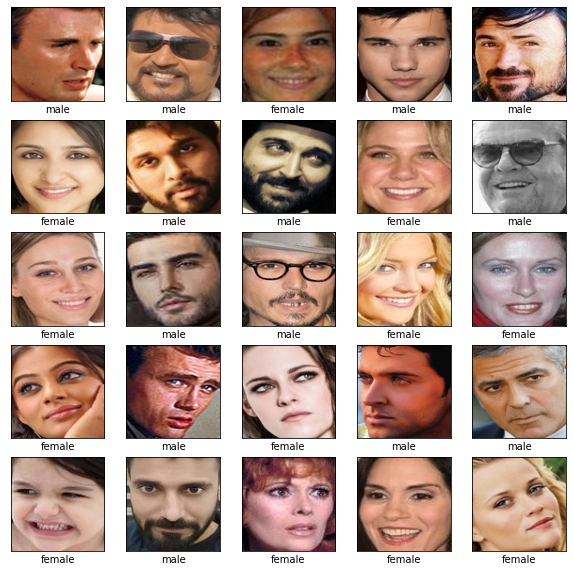

In [ ]:
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i], cmap='binary')
    plt.xlabel(class_names[yname[i]])
plt.show()

In [ ]:
#x_train,x_validation,y_train,y_validation = train_test_split(x_data,y_data,test_size=0.2,random_state=100)
x_train=x_train.astype('float32')
x_validation=x_validation.astype('float32')
x_train/=255
x_validation/=255
y_train=np_utils.to_categorical(y_train,2)
y_validation= np_utils.to_categorical(y_validation,2)

In [ ]:
model = Sequential()
model.add(Conv2D(32, (3,3), padding="same", input_shape=(100,100,3)))
model.add(Activation("relu"))

model.add(Conv2D(64, (3,3), padding="same"))
model.add(Activation("relu"))
model.add(Conv2D(64, (3,3), padding="same"))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Conv2D(128, (3,3), padding="same"))
model.add(Activation("relu"))
model.add(Conv2D(128, (3,3), padding="same"))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Flatten())
model.add(Dense(512))
model.add(Activation("relu"))
model.add(Dropout(0.2))
model.add(Dense(2,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 100, 100, 32)      896       
                                                                 
 activation (Activation)     (None, 100, 100, 32)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 100, 100, 64)      18496     
                                                                 
 activation_1 (Activation)   (None, 100, 100, 64)      0         
                                                                 
 conv2d_2 (Conv2D)           (None, 100, 100, 64)      36928     
                                                                 
 activation_2 (Activation)   (None, 100, 100, 64)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 50, 50, 64)       0

In [ ]:
model.compile(optimizer="Adam",loss='categorical_crossentropy',metrics=['accuracy'])
model_path='drive/MyDrive/baithi/model/gender.h5'
checkpointer = ModelCheckpoint(model_path, monitor='loss',verbose=1,save_best_only=True,
                               save_weights_only=False, mode='auto',save_freq='epoch')
callback_list=[checkpointer]

In [ ]:
history=model.fit(IDG.flow(x_train, y_train,batch_size=100),epochs=40,verbose=1,validation_data=(x_validation,y_validation), callbacks=[callback_list])

Epoch 1/40
35/35 [==============================] - ETA: 0s - loss: 0.7246 - accuracy: 0.6033
Epoch 1: loss improved from inf to 0.72459, saving model to drive/MyDrive/baithi/model/gender.h5
35/35 [==============================] - 36s 700ms/step - loss: 0.7246 - accuracy: 0.6033 - val_loss: 0.4884 - val_accuracy: 0.7730
Epoch 2/40
35/35 [==============================] - ETA: 0s - loss: 0.5905 - accuracy: 0.6995
Epoch 2: loss improved from 0.72459 to 0.59046, saving model to drive/MyDrive/baithi/model/gender.h5
35/35 [==============================] - 10s 273ms/step - loss: 0.5905 - accuracy: 0.6995 - val_loss: 0.4827 - val_accuracy: 0.8018
Epoch 3/40
35/35 [==============================] - ETA: 0s - loss: 0.5037 - accuracy: 0.7640
Epoch 3: loss improved from 0.59046 to 0.50371, saving model to drive/MyDrive/baithi/model/gender.h5
35/35 [==============================] - 11s 322ms/step - loss: 0.5037 - accuracy: 0.7640 - val_loss: 0.4095 - val_accuracy: 0.8248
Epoch 4/40
35/35 [=====

In [ ]:
model_gender=load_model('drive/MyDrive/baithi/model/gender.h5')

In [ ]:
listtest=[]
listtest=Getdata(test,listtest)
x_test=np.array([x[0] for _ ,x in enumerate(listtest)])
print(x_test.shape)

6
12
(12, 100, 100, 3)


In [ ]:
x_test[0].shape

(100, 100, 3)

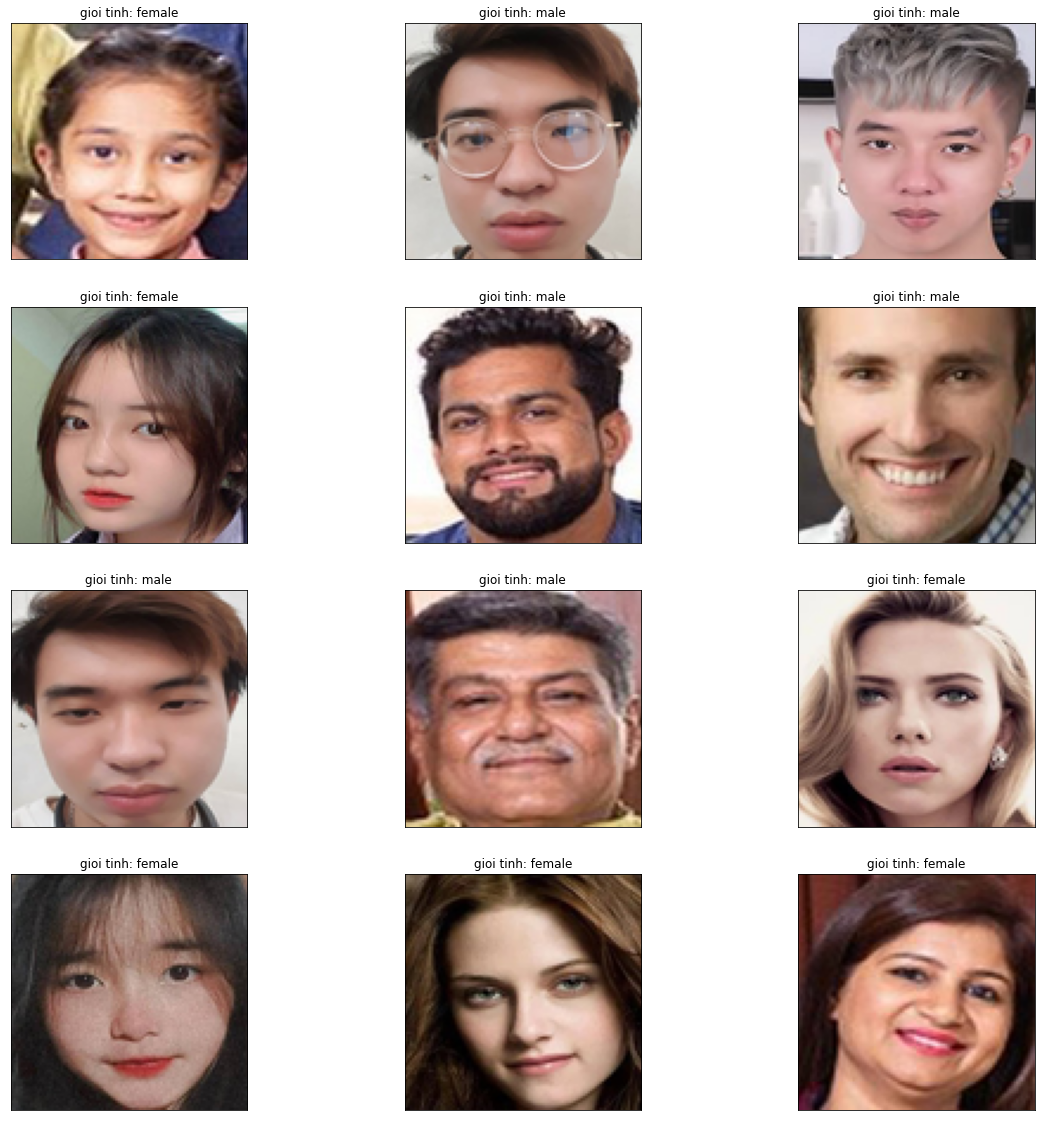

In [ ]:
plt.figure(figsize=(20, 20))
for i in range(12):
    plt.subplot(4, 3, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_test[i], cmap='binary')
    plt.title("gioi tinh: " + str(class_names[np.argmax(model_gender.predict(x_test[i].reshape((-1,100,100,3))))]))
plt.show()

In [ ]:
pip install mtcnn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.3 MB 5.1 MB/s 


In [ ]:
#khai báo thư viện
import cv2
import matplotlib.pyplot as plt
from mtcnn import MTCNN

In [ ]:
image_path='drive/MyDrive/baithi/gender_data/test nhieu mat/em.jpg'

1: male


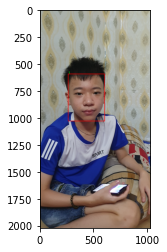

In [ ]:
class_names=['male','female']
img=plt.imread(image_path)
detector=MTCNN() ## THU VIEN DA TRAIN SAN
faces=detector.detect_faces(img)
i=0
for face in faces:
  i = i+1
  x,y,w,h=face['box']
  cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),3)
  img_cat=img[y:y+h,x:x+w]
  img_cat=np.resize(img_cat, (100,100,3))
  img_cat=img_cat.astype('float32')
  img_cat/=255
  output_gender=class_names[np.argmax(model_gender.predict(img_cat.reshape(-1,100,100,3)))]
  output_str = str(i) + ": "+  output_gender
  print(output_str)
  col = (0,255,0)
  cv2.putText(img, str(i),(x,y),cv2.FONT_HERSHEY_SIMPLEX,1,col,2)
plt.imshow(img)